In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

print(salary.head())

   Experience Years  Salary
0               1.1   39343
1               1.2   42774
2               1.3   46205
3               1.5   37731
4               2.0   43525


In [11]:
salary.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [5]:
X = salary["Experience Years"]
y = salary["Salary"]

In [6]:
salary.isnull().sum() # No null values

Experience Years    0
Salary              0
dtype: int64

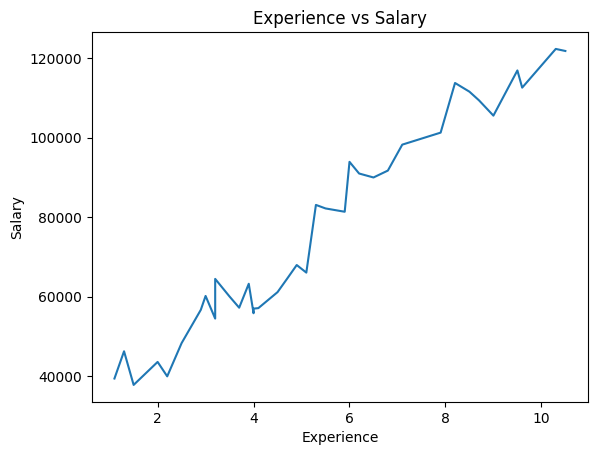

In [7]:
# Plot data for exploratory data analysis
plt.plot(X, y)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")

plt.show()

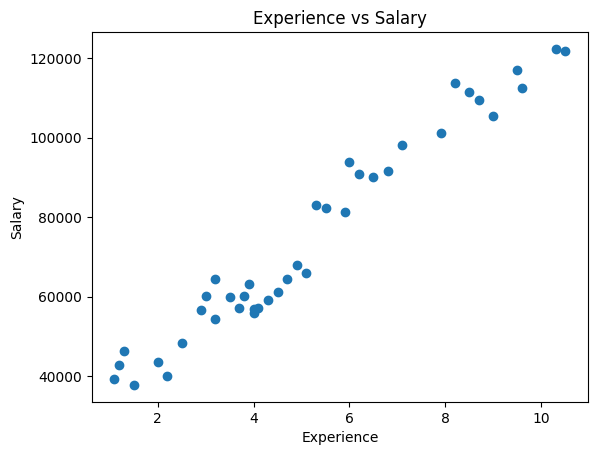

In [8]:
plt.scatter(X, y)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")

plt.show()

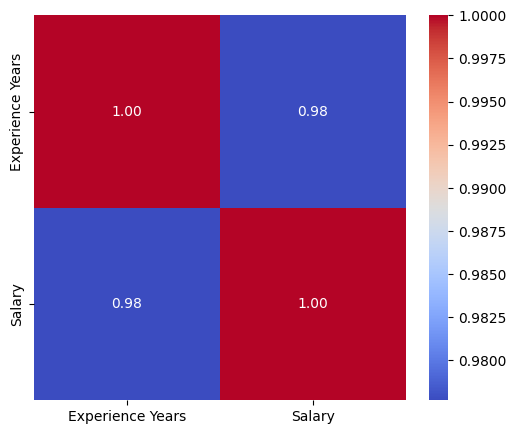

In [9]:
# HeatMap for correlation detection

corr_mat = salary.corr()


plt.figure(figsize=(6, 5))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

Weight => 9523.650507417731, Bias => 25673.015760530106


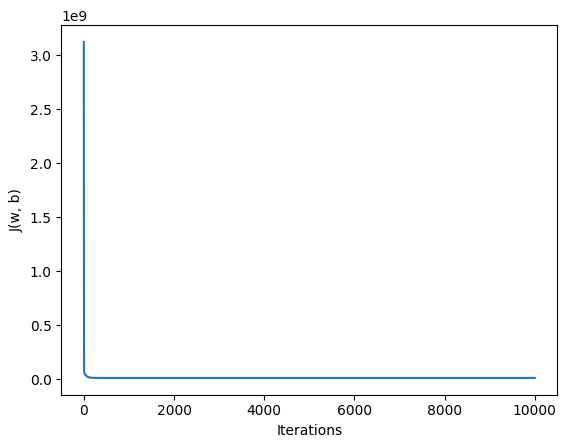

Final Cost: 14480191.826888103


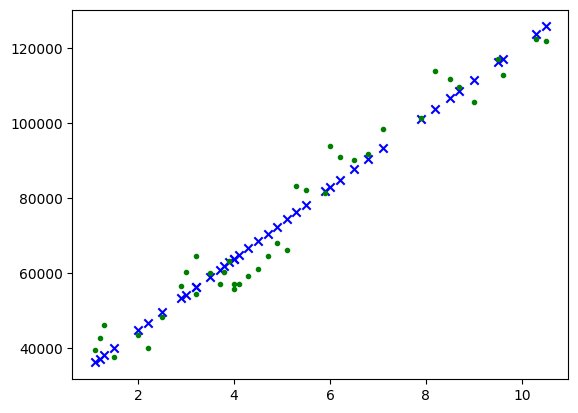

In [10]:
# Linear Regression

def calc_cost(x_train, y_train, w, b) -> float:
    res: float = 0
    m: int = len(x_train)

    for i in range(m):
        f_wb: float = w * x_train[i] + b
        res += (f_wb - y_train[i]) ** 2

    res /= 2 * m

    return res

def diff_terms(x_train, y_train, w: float, b: float) -> tuple[float, float, float]:
    dj_dw: float = 0
    dj_db: float = 0
    cost: float = 0

    m: int = len(x_train)

    for i in range(m):
        f_wb: float = w * x_train[i] + b
        diff: float = (f_wb - y_train[i])

        cost += diff * diff
        dj_db += diff
        dj_dw += diff * x_train[i]

    dj_dw /= m
    dj_db /= m
    cost /= 2 * m

    return dj_dw, dj_db, cost


def gradient_descent(x_train, y_train, iterations: int, learning_rate: float) -> tuple[float, float, list[float]]:
    w: float = 0
    b: float = 0
    cost: list[float] = []

    for _ in range(iterations):
        dj_dw, dj_db, curr_cost = diff_terms(x_train, y_train, w, b)

        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db
        cost.append(curr_cost)

    return (w, b, cost)


def run():
    x_train = X
    y_train = y
    iterations = 10000

    m: int = len(x_train)

    w, b, cost = gradient_descent(x_train, y_train, iterations, 0.05)

    plt.plot(np.arange(iterations), cost)
    plt.xlabel("Iterations")
    plt.ylabel("J(w, b)")
    print(f"Weight => {w}, Bias => {b}")
    plt.show()

    print(f"Final Cost: {calc_cost(x_train, y_train, w, b)}")

    test(x_train, y_train, w, b)


def test(x_train, y_train, w: float, b: float):
    m: int = len(x_train)
    predicted: list[float] = []

    for i in range(m):
        f_wb = w * x_train[i] + b
        predicted.append(f_wb)

    plt.scatter(x_train, predicted, c='b', marker='x')
    plt.scatter(x_train, y_train, c ='g', marker='.')

    plt.plot()


run()